# 1. Введение

## Вспомним как выглядит цикл решения мл-задачи

![crisp-dm](./images/crisp-dm.png)

### Предсказание оттока клиентов

Чтобы потренироваться решать задачу **оттока**, сначала поймем зачем может понадобиться такая задача.

Представим, что у нас есть банк, и клиенты хранят у нас свои деньги, понятно, что мы можем использовать их средства для операций компании. И чем больше у нас запасы, тем больший потенциал у нас есть. Хорошо, получается, нам важен каждый клиент.

Предположим, что всего у нас 100 000 клиентов и каждый хранит на своем счете **1 миллион рублей**. Получается у нас есть **10 миллиардов**. \
**Ого! И это только средств, а сколько мы можем заработать на каждом миллионе!**


![churn2](./images/churn2.png)

А что, если вдруг 10% клиентов от нас уйдет?

**Мы потеряем миллиард рублей средств, да еще и нашу прибыль сократим. \
Нужно стараться удержать наших клиентов, каждый очень ценен!**

Хорошо, мы поняли нашу задачу - это бинарная классификация на два класса **уйдет** клиент из банка или **не уйдет**.
Будем предсказывать вероятность того, что клиент оттечет, то есть число в диапазоне от 0 до 1.


Бизнес выгода ясна, также представим, что данные мы тоже придумали откуда достать.

Теперь нам нужно понять **как же уменьшить наши потери** в миллион до какого-то небольшого числа?

![churn4](./images/churn4.png)

### Составим план действий:

#### 1) Подготовка данных
    * Выборка данных
    * Разведочный анализ данных
    * Очистка данных на основе анализа
    * Генерация вспомогательных данных
    
#### 2) Моделирование
    * Выбор алгоритма	
    * Выбор мета-метрики	
    * План тестирования алгоритма
    * Обучение моделей
    * Оценка качества модели

# 2. Подготовка данных


![churn5](./images/churn5.png)

   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Построение бейзлайна

Выборка данных у нас уже есть - мы будем использовать данные с сайта kaggle для такой же задачи. \
**Ссылка на соревнование:** https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

**Разведочный анализ данных:**
В рамках разведочного анализа данных, его также называют **EDA(Exploratory Data Analysis)**, мы стремимся определить и визуализировать, какие факторы способствуют оттоку клиентов.

In [1]:
#Наши стандартные библиотеки
import numpy as np
import pandas as pd

# Для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
train = pd.read_csv('./data_/train.csv')
test = pd.read_csv('./data_/test.csv')

In [3]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0


In [4]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4801,15679810,Chapman,690,France,Male,39,6,0.00,2,1,0,160532.88
1,2102,15778934,Napolitani,678,Spain,Female,49,8,0.00,2,0,1,98090.69
2,4487,15660646,Fanucci,528,France,Male,35,3,156687.10,1,1,0,199320.77
3,1127,15593973,Wilkie,663,Spain,Female,33,8,122528.18,1,1,0,196260.30
4,383,15568240,Ting,492,Germany,Female,30,10,77168.87,2,0,1,146700.22


![churn8](./images/churn10.png)

In [3]:
from teacher_bot.churn_prediction import ChurnPrediction

Это Бот ProductStar он будет проверять твои задания

In [4]:
BotProductStar = ChurnPrediction()

Привет! Приятно познакомиться!


In [5]:
BotProductStar.test_task(df = train)

Думаю...
Ого! Датасет, сейчас мы будем его исследовать, интересно, что в нем.
Сам я не справляюсь - нужна твоя помощь


### Задание 1. Бот тебе его расскажет - запусти ячейку ниже.

In [11]:
BotProductStar.drop_task(df1)

Думаю...
Ой-ой. Я тебя не понимаю, мне нужен pd.DataFrame без колонок, в которых слишком много уникальных значений


In [9]:
train.nunique()

RowNumber          7200
CustomerId         7200
Surname            2459
CreditScore         455
Geography             3
Gender                2
Age                  68
Tenure               11
Balance            4566
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    7200
Exited                2
dtype: int64

In [10]:
train.shape

(7200, 14)

In [10]:
df1 = train.drop(["CustomerId", "RowNumber", "Surname"], axis = 1)

In [31]:
test = test.drop(["CustomerId", "Surname"], axis = 1)

In [40]:
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0
1,619,France,Female,35,4,90413.12,1,1,1,20555.21,0
2,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0
4,638,France,Male,34,5,133501.36,1,0,1,155643.04,0
5,633,France,Male,37,7,141546.35,1,1,1,124830.11,0
6,677,Germany,Male,28,0,143988.00,2,1,0,8755.69,1
7,801,Spain,Male,42,4,141947.67,1,1,1,10598.29,0
8,768,France,Male,25,0,78396.08,1,1,1,8316.19,0
9,752,France,Male,38,0,145974.79,2,1,1,137694.23,0


![churn8](./images/churn11.png)

### Задание 2. Бот тебе его расскажет - запусти ячейку ниже.

In [41]:
 BotProductStar.null_task()

Нужно понять есть ли в датафрейме пропущенные значения и отправить ответ мне
Я понимаю только 'Да' или 'Нет'


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7200 non-null   int64  
 1   Geography        7200 non-null   object 
 2   Gender           7200 non-null   object 
 3   Age              7200 non-null   int64  
 4   Tenure           7200 non-null   int64  
 5   Balance          7200 non-null   float64
 6   NumOfProducts    7200 non-null   int64  
 7   HasCrCard        7200 non-null   int64  
 8   IsActiveMember   7200 non-null   int64  
 9   EstimatedSalary  7200 non-null   float64
 10  Exited           7200 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 618.9+ KB


In [13]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
BotProductStar.null_task(answer='нет')

Думаю...
Ура! Второе задание позади!
Следующая кодовая фраза Science


   - [x] Выборка данных
   - [ ] Разведочный анализ данных
   - [x] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных

In [ ]:
train.head()

Данные выглядят, как снимок на определенный момент времени 
Возможно баланс на заданную дату, что **оставляет много вопросов:**
    * Какая это дата и какое значение она имеет?
    * Можно ли получить баланс за определенный период времени, а не за одну дату.
    * Есть клиенты, которые вышли, но все еще имеют остаток на счете! Что бы это значило? Могли они выйти из продукта, а не из банка?
    * Что значит быть активным участником и есть ли в этом разные степени? Может быть, лучше вместо этого предоставить счет транзакций, как по кредитам, так и по дебету счета?
Разбивка на продукты, купленные клиентом, может предоставить дополнительную информацию, которая увеличит список продуктов.


![churn8](./images/churn14.png)

Здесь мы приступаем к моделированию без контекста, хотя обычно наличие контекста и лучшее понимание процесса извлечения данных дает более качественные модели.

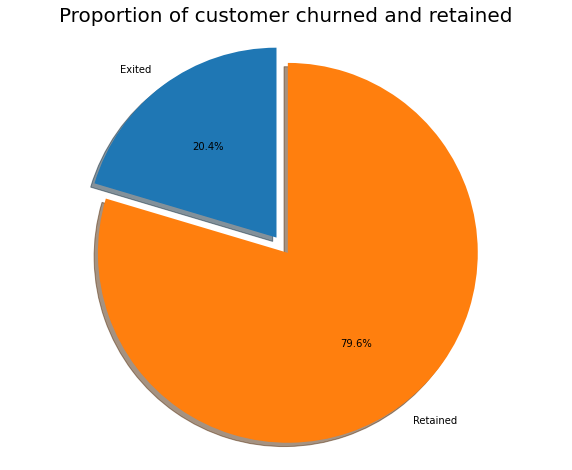

In [56]:
labels = 'Exited', 'Retained'
sizes = [train.Exited[train['Exited']==1].count(), train.Exited[train['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Таким образом, около 20% клиентов ушли. Базовая модель может предполагать, что 20% клиентов уйдут.
Учитывая, что 20% - это небольшое число, нам необходимо убедиться, что выбранная модель действительно предсказывает с большой точностью эти 20%, поскольку для банка интересно идентифицировать и сохранить клиентов.

##### Анализ категориальных переменных

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

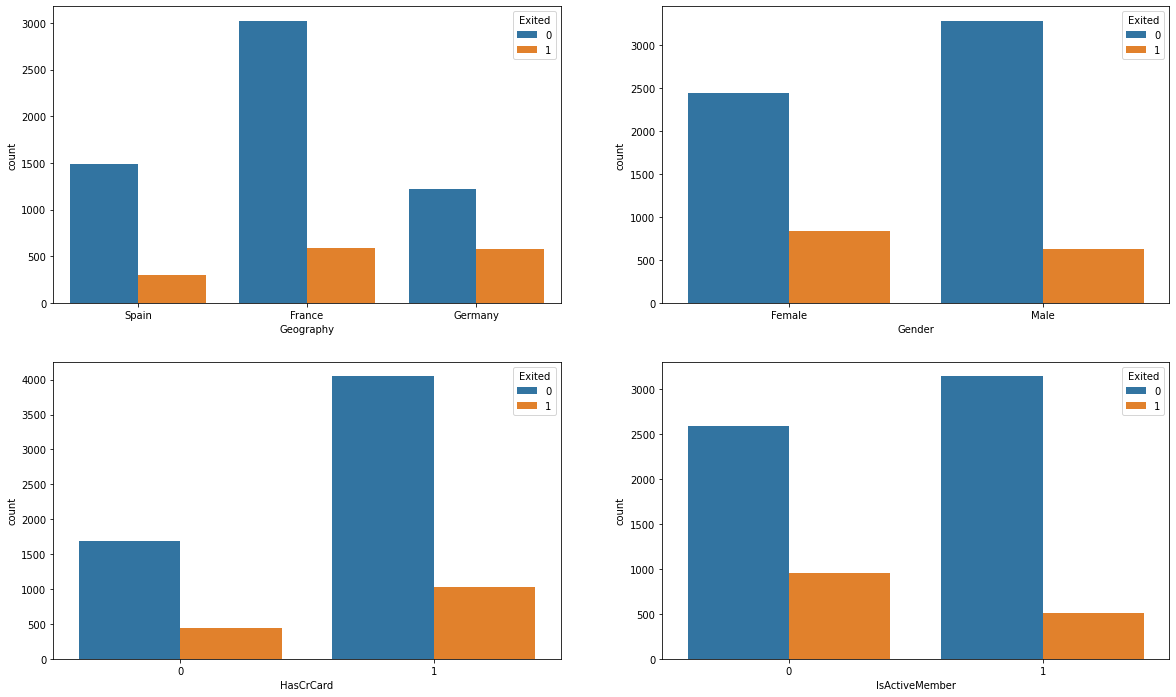

In [57]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = train, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = train, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = train, ax=axarr[1][1])

**Отметим следующее:**

* Большинство данных от лиц из Франции. Возможно, у банка недостаточно ресурсов для обслуживания клиентов в тех областях, где у него меньше клиентов.
* Доля сменяющих клиентов женщин также выше, чем доля клиентов-мужчин.
* Интересно, что большинство клиентов, которые ушли, - это клиенты с кредитными картами. Учитывая, что у большинства клиентов есть кредитные карты, это может оказаться простым совпадением.
* Неудивительно, что у неактивных участников больше отток. 
* Общая доля неактивных клиентов довольно высока, можно предположить, что банку потребуется программа, направленная на превращение этой группы в активных клиентов.

##### Анализ количественных переменных

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

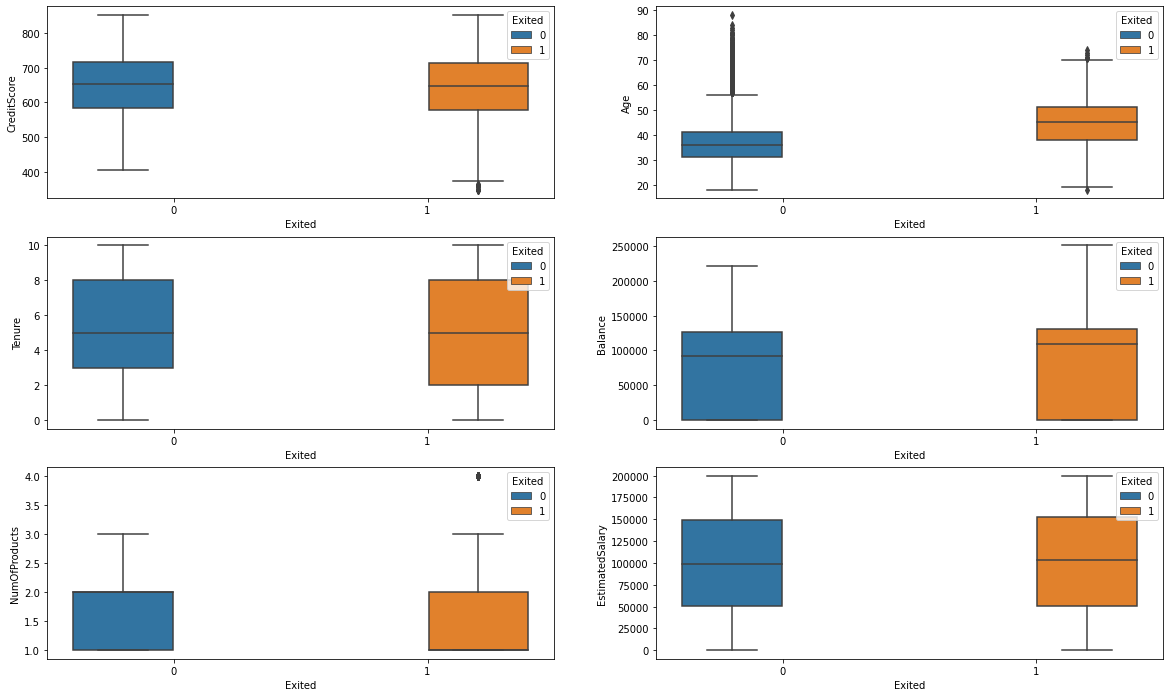

In [58]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = train, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = train , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = train, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = train, ax=axarr[2][1])

**Отметим следующее:**
* Нет существенной разницы в распределении кредитного рейтинга между оставшимися и оттекшими клиентами.
* Старшие клиенты оттекают чаще, чем более молодые, это намекает на разницу в предпочтениях обслуживания в возрастных категориях. Банку может потребоваться пересмотреть свой целевой рынок или пересмотреть стратегию удержания клиентов между разными возрастными группами.
* Что касается срока владения, то клиенты, находящиеся на крайнем конце (мало времени проводившие с банком или много времени в банке), с большей вероятностью уйдут, чем те, которые имеют средний срок.
* Банк теряет клиентов со значительными остатками на банковских счетах, что может снизить их доступный капитал для кредитования.
* Ни продукт, ни зарплата не оказывают существенного влияния на вероятность оттока.

В целом к разведочному анализу данных можно также отнести **построение базового решения**. Важно делать на самом первом этапе, чтобы на пальцах прикидывать, а сколько можно сэкономить денег.

**Например:**
Скажем, чтобы привлечь клиента мы тратим 100 000р, а зарабатываем в год на каждом 200 000р.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#возьмем случайную подвыборку из train и оценим на ней сколько мы экономим
val_sample = train.sample(frac=0.2, random_state=42).reset_index(drop=True)

In [ ]:
val_sample.Exited.value_counts()

Всего видим, что ушло 295 клиентов. 
Получается мы потеряли 295 000 000р!

Есть ли что-то, что мы могли с этим сделать?

Давайте посчитаем экономию, при предскзаании алгоритмом, который случайно возвращает 0 или 1, то есть с вероятностью 0.5 говорит, что клиент оттечет и с такой же вероятностью, что клиент не оттечет.

Отсюда поймём, а имееют ли смысл вообще акции по привлечению клиентов.

In [ ]:
np.random.seed(42)
rand_prediction = np.random.randint(2, size=len(val_sample))

In [ ]:
tn, fp, fn, tp = confusion_matrix(val_sample.Exited, rand_prediction).ravel()

In [ ]:
print(f'Удержали уходящих: {tp}')
print(f'Удерживали, но они и не собирались уходить: {fp}')
print(f'Не стали удерживать и они ушли: {fn}')
print(f'Правильно не стали удерживать: {tn}')

Посчитаем сколько мы потратили всего на привлечение:
(145 + 575) * 100 000 =  72 000 000

А сколько потеряли на тех, кто ушел:
150 000 000

Количество денег ушедших из банка **ничего не делали: 295 000 000**\
Количество денег ушедших из банка **простейшей модели: 150 000 000**

**Удержано денег в банке: 145 000 000**\
**При расходах: 72 000 000**

Ого и это мы даже машинное обучение еще не начали использовать! И взяли только 20% от всей выборки.

На этом наш разведочный анализ можно закончить - мы узнали все, что нас интересует.

   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

# Домашнее задание

##### С помощью этого метода можно делать посылки боту с предскзаниями, а он будет возвращать результат.

In [117]:
BotProductStar.production_quality(answer=df4)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8192948839050368
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


In [14]:
import os
import xgboost as xgb
import catboost as cb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [23]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

In [17]:
df1 = pd.get_dummies(df1, columns=['Geography', 'Gender'])

In [18]:
x_train = df1.drop(["Exited"], axis=1)
y_train = df1["Exited"]

In [32]:
test1 = test.drop(["RowNumber"], axis = 1)

In [33]:
test1 = pd.get_dummies(test1, columns=['Geography', 'Gender'])

In [62]:
#DecisionTree
model = DecisionTreeClassifier(random_state=1, max_depth=7)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [63]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
print(f"Train-score: {round(train_score, 3)}")

Train-score: 0.88


In [64]:
submission = test[['RowNumber']].copy()
baseline = model.predict_proba(test1)
df3 = pd.concat([submission, pd.DataFrame(baseline, columns = ['predicttttt','predict'])], axis=1)
df3 = df3.drop(["predicttttt"], axis = 1)

In [42]:
#XGBoost
model = xgb.XGBClassifier(random_state=27)
model.fit(x_train, y_train)

XGBClassifier(random_state=27)

In [49]:
y_pred = model.predict_proba(x_train)
score = roc_auc_score(y_train, y_pred[:, 1])
print(f"score = {round(score, 4)}")

score = 0.8873


In [52]:
submission = test[['RowNumber']].copy()
baseline = model.predict_proba(test1)
df4 = pd.concat([submission, pd.DataFrame(baseline, columns = ['predicttttt','predict'])], axis=1)
df4 = df4.drop(["predicttttt"], axis = 1)

In [53]:
#CatBoost
model = cb.CatBoostClassifier(random_state=27)
model.fit(x_train, y_train)

Learning rate set to 0.023934
0:	learn: 0.6740068	total: 85.2ms	remaining: 1m 25s
1:	learn: 0.6553368	total: 102ms	remaining: 51s
2:	learn: 0.6366046	total: 111ms	remaining: 36.8s
3:	learn: 0.6231907	total: 117ms	remaining: 29.2s
4:	learn: 0.6072357	total: 124ms	remaining: 24.6s
5:	learn: 0.5954533	total: 130ms	remaining: 21.5s
6:	learn: 0.5815082	total: 136ms	remaining: 19.3s
7:	learn: 0.5682544	total: 141ms	remaining: 17.5s
8:	learn: 0.5555634	total: 145ms	remaining: 16s
9:	learn: 0.5456741	total: 149ms	remaining: 14.8s
10:	learn: 0.5355739	total: 153ms	remaining: 13.7s
11:	learn: 0.5262331	total: 157ms	remaining: 12.9s
12:	learn: 0.5162779	total: 161ms	remaining: 12.2s
13:	learn: 0.5092771	total: 164ms	remaining: 11.5s
14:	learn: 0.4992471	total: 167ms	remaining: 11s
15:	learn: 0.4921931	total: 170ms	remaining: 10.5s
16:	learn: 0.4851654	total: 175ms	remaining: 10.1s
17:	learn: 0.4764473	total: 180ms	remaining: 9.82s
18:	learn: 0.4696805	total: 184ms	remaining: 9.52s
19:	learn: 0.46

In [54]:
y_pred = model.predict_proba(x_train)
score = roc_auc_score(y_train, y_pred[:, 1])
print(f"score = {round(score, 4)}")

score = 0.9537


In [56]:
submission = test[['RowNumber']].copy()
baseline = model.predict_proba(test1)
df5 = pd.concat([submission, pd.DataFrame(baseline, columns = ['predicttttt','predict'])], axis=1)
df5 = df5.drop(["predicttttt"], axis = 1)

Это тестовый пример посылки, вам нужно будет точно также предсказывать вероятность для каждого наблюдения и делать посылки, отправляя их боту.

In [58]:
#LogisticRegression
pipeline = Pipeline(
    steps=[
        ("scaling", StandardScaler()),
        ("model", LogisticRegression(random_state=27))
    ]
)
pipeline.fit(x_train, y_train)


Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(random_state=27))])

In [59]:
train_score = roc_auc_score(y_train, pipeline.predict_proba(x_train)[:, 1])
print(f"Train-score: {round(train_score, 3)}")

Train-score: 0.771


In [60]:
submission = test[['RowNumber']].copy()
baseline = model.predict_proba(test1)
df2 = pd.concat([submission, pd.DataFrame(baseline, columns = ['predicttttt','predict'])], axis=1)
df2 = df2.drop(["predicttttt"], axis = 1)

In [65]:
BotProductStar.production_quality(answer=df3)

Запускаю тестирование...
Проверяю метрики...
Твой результат: 0.8372016660819187
Наконец-то мы  сэкономили денег! Чтобы себя порадовать - можно посчитать примерные значения в деньгах, как мы посчитали с бейзлайном :). Финальная кодовая фраза '- моя любимая наука' Если вспомнить все предыдущие получится: Data Science - моя любимая наукаЧто-то правда, то правда - обожаю анализировать данные, особенно, когда мне помогают


Следующая часть урока полностью ложится на ваши плечи:
* Нужно правильно сгенерировать вспомогательные признаки, но сильно можно не увлекаться.
* Правильно их обработать для подачи в модель.
* И построить модель, которая будет давать достаточное качество.

Для защиты проекта необходимо будет построить модель, качество которой дает ROC-AUC не ниже 0.8. Оцениваться модель будет с помощью бота, а точнее функции - `BotProductStar.production_quality(answer=submission)`



submission - это датафрем, в котором в первой колонке указан RowNumber из файла test, а в колонке predict предсказанная вероятность ухода клиента.

Здесь можно продолжить построение модели. Давайте вспомним, какие пункты осталось сделать.

### Подготовка данных
   - [x] Выборка данных
   - [x] Разведочный анализ данных
   - [ ] Очистка данных на основе анализа
   - [ ] Генерация вспомогательных данных
   - [ ] Предобработка данных

####  Моделирование
   - [ ]  Выбор алгоритмов	
   - [ ]  Выбор мета-метрики	
   - [ ]  План тестирования алгоритма
   - [ ]  Обучение моделей
   - [ ]  Оценка качества модели